In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Weight decay data

In [17]:
weight_df = pd.read_csv('weight_decay_effect.csv')
layers_columns = weight_df.columns[4:]

In [18]:
weight_df[layers_columns].var(axis=0)

conv_encoder_00      1.026399e+06
linear_pred_00       7.373409e+02
conv_encoder_02      6.751620e+05
linear_pred_02       3.567265e+03
conv_encoder_04      3.954202e+05
linear_pred_04       2.800656e+03
linear_encoder_06    2.966689e+04
linear_pred_06       1.151792e+03
linear_07            9.023835e+02
dtype: float64

In [19]:
selected_block = 2
block_columns = [f'conv_encoder_0{selected_block}', f'linear_pred_0{selected_block}']
variables = ['fwd_decay_inv', 'subnet_decay_inv']

In [20]:
cols = variables + block_columns

In [21]:
weight_df['fwd_decay_inv'] = weight_df['fwd_decay_inv'].replace(0, 10_000)
weight_df['subnet_decay_inv'] = weight_df['subnet_decay_inv'].replace(0, 3000)

In [22]:
values = [250, 500, 1000, 3000]
weight_df = weight_df[weight_df['subnet_decay_inv'].isin(values)]

In [23]:
weight_x_labels = weight_df['fwd_decay_inv'].replace(10_000, 'No\ndecay').unique()
weight_y_labels = weight_df['subnet_decay_inv'].unique()

## Dim learning layers data

In [24]:
df_dim = pd.read_csv('pred_dim_effect.csv')
df_dim = df_dim.drop(0)
df_dim

,pred_decoder_dim,train_acc,test_acc
1,512,69.038,66.22
2,1024,77.358,70.01
3,2048,80.196,66.96
4,4096,72.500,59.72
5,8192,66.988,56.90


## Plot

In [25]:
params = {
   'font.size': 26,
   'axes.linewidth': 1.25,
   'axes.labelsize': 26,
   'legend.fontsize': 22,
   'xtick.labelsize': 26,
   'ytick.labelsize': 26,
}
plt.rcParams.update(params)

In [26]:
# Weight decay
weight_title = 'Effects of weight decay on the convolutional layer'
weight_x_label = '$\eta_{inv}$ forward'
weight_y_label = 'Mean absolute value'
weight_legend_labels = ['$\eta_{inv}^{lr}$ = ' + str(value) for value in weight_y_labels]
weight_legend_labels[0] = 'No decay'

In [27]:
from palettable.colorbrewer.qualitative import Set2_4
weight_colors = Set2_4.mpl_colors

In [28]:
# Learning dimension
dim_title = 'Effect of $d^{lr}$ on the accuracy'
dim_x_label = '$d^{lr}$'
dim_y_label = 'Accuracy (%)'
dim_legend_labels = ['Train accuracy', 'Test accuracy']

In [29]:
from palettable.colorbrewer.qualitative import Set2_3
dim_colors = Set2_3.mpl_colors

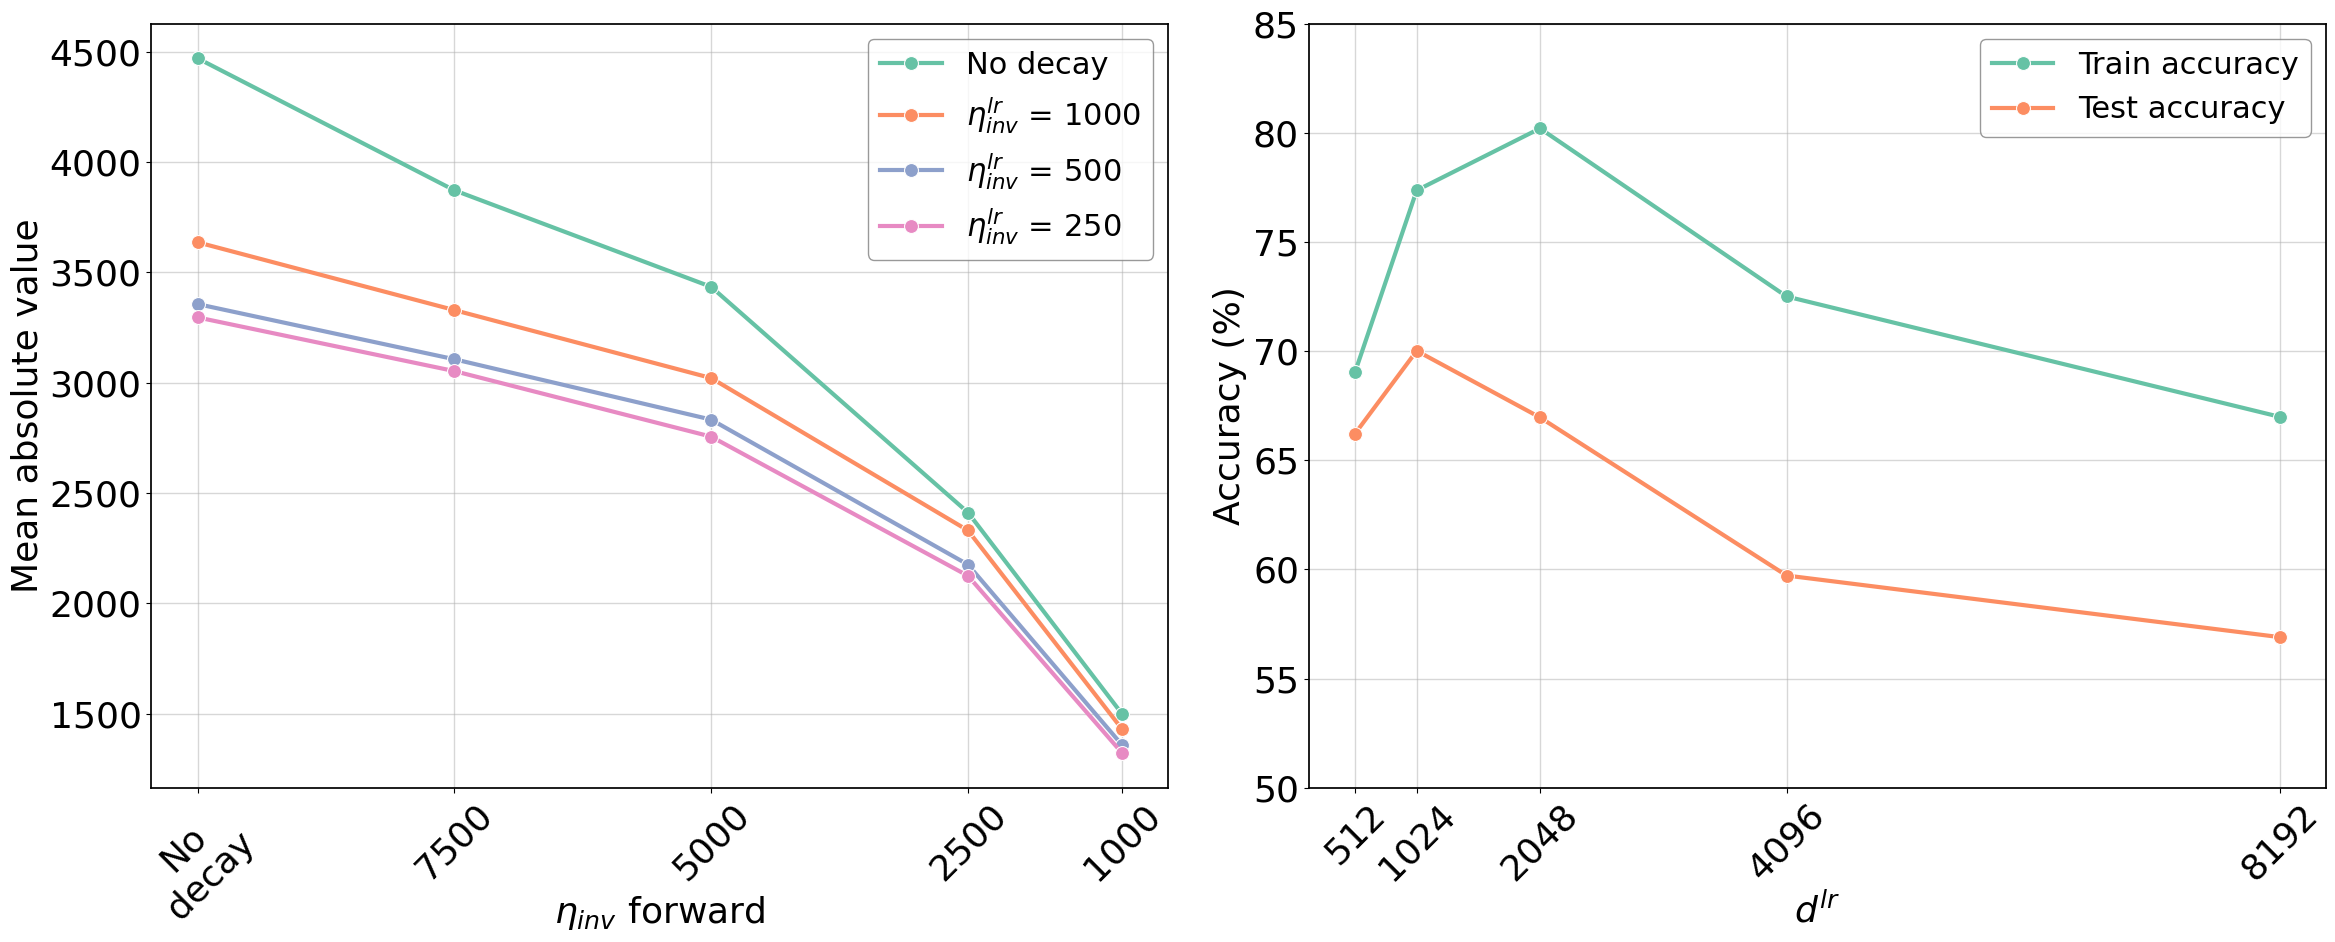

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(24, 10))

# Weight decay plot
axs[0].set_xlabel(weight_x_label, labelpad=-23)
axs[0].set_ylabel(weight_y_label)

sns.lineplot(
    data=weight_df, x='fwd_decay_inv',y=block_columns[0],
    hue='subnet_decay_inv', ax=axs[0], marker='o', errorbar=None, 
    linewidth=3, markersize=10, palette=weight_colors
)

axs[0].invert_xaxis() 
axs[0].set_xticks(weight_df['fwd_decay_inv'].unique(), labels=weight_x_labels)
axs[0].xaxis.set_tick_params(rotation=45)
axs[0].tick_params(axis='x')
axs[0].tick_params(axis='y')  

legend = axs[0].legend(weight_legend_labels, loc='upper right')
frame = legend.get_frame()
frame.set_edgecolor('0.5')
axs[0].grid(linewidth=1, alpha=0.5, axis='both')

# Dimension plot
kwargs = dict(ax=axs[1], marker='o', linestyle='-', errorbar=None, linewidth=3, markersize=10)
sns.lineplot(data=df_dim, x='pred_decoder_dim', y='train_acc', **kwargs, color=dim_colors[0])
sns.lineplot(data=df_dim, x='pred_decoder_dim', y='test_acc', **kwargs, color=dim_colors[1])
 
axs[1].set_xticks(df_dim['pred_decoder_dim'].unique())
axs[1].xaxis.set_tick_params(rotation=45)
axs[1].set_xlabel(dim_x_label)
axs[1].set_yticks(range(0, 101, 5), labels=range(0, 101, 5))
axs[1].set_ylim(50, 85)
axs[1].set_ylabel(dim_y_label)

# ax.set_title(title, fontsize=25)
legend = axs[1].legend(dim_legend_labels)
frame = legend.get_frame()
frame.set_edgecolor('0.5')
axs[1].grid(linewidth=1, alpha=0.5, axis='both')

plt.tight_layout()
plt.savefig('weight+dim_effect.pdf')